In [54]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

In [55]:
# file_path = 'C:/Users/Gina/Pictures/md/heart_attack_prediction_indonesia.csv'
file_path = './heart_attack_prediction_indonesia.csv' # Path to the dataset
TARGET = "heart_attack"
data = pd.read_csv(
    file_path,
    sep = ',',
    na_values = "."
)

print(f"Originally we have {data.shape[0]} samples and {data.shape[1]} features.")  # Shape returns (nº samples, nº features)
#print(data.describe())
#data.head()

n_samples = 20000
df = data.sample(n=n_samples)
print(f"For this project we have {df.shape[0]} samples and {df.shape[1]} features.")
print(df.describe())
df.head()

Originally we have 158355 samples and 28 features.
For this project we have 20000 samples and 28 features.
                age  hypertension     diabetes  cholesterol_level  \
count  20000.000000  20000.000000  20000.00000       20000.000000   
mean      54.566100      0.297850      0.19705         199.771350   
std       11.973663      0.457325      0.39778          39.636268   
min       25.000000      0.000000      0.00000         100.000000   
25%       46.000000      0.000000      0.00000         173.000000   
50%       55.000000      0.000000      0.00000         200.000000   
75%       63.000000      1.000000      0.00000         227.000000   
max       90.000000      1.000000      1.00000         350.000000   

            obesity  waist_circumference  family_history   sleep_hours  \
count  20000.000000         20000.000000    20000.000000  20000.000000   
mean       0.251650            93.290600        0.297150      6.476504   
std        0.433972            16.401049        0

,age,gender,region,income_level,hypertension,diabetes,cholesterol_level,obesity,waist_circumference,family_history,...,blood_pressure_diastolic,fasting_blood_sugar,cholesterol_hdl,cholesterol_ldl,triglycerides,EKG_results,previous_heart_disease,medication_usage,participated_in_free_screening,heart_attack
139206,50,Female,Urban,Middle,0,1,105,0,92,0,...,69,102,62,154,72,Normal,0,0,1,0
11169,53,Female,Urban,Middle,1,1,222,0,96,1,...,91,138,43,133,210,Normal,0,1,1,1
26179,63,Male,Rural,Middle,0,0,207,0,87,0,...,80,116,58,151,203,Normal,0,1,1,0
42569,46,Male,Rural,Low,0,0,164,0,78,0,...,90,128,43,87,133,Normal,0,1,1,1
42063,61,Male,Urban,Middle,0,0,167,0,107,0,...,74,160,66,169,161,Normal,0,1,1,1


## Uni-variate Descriptive Analysis

In [56]:
df.describe(include = "all")

,age,gender,region,income_level,hypertension,diabetes,cholesterol_level,obesity,waist_circumference,family_history,...,blood_pressure_diastolic,fasting_blood_sugar,cholesterol_hdl,cholesterol_ldl,triglycerides,EKG_results,previous_heart_disease,medication_usage,participated_in_free_screening,heart_attack
count,20000.000000,20000,20000,20000,20000.000000,20000.00000,20000.000000,20000.000000,20000.000000,20000.000000,...,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000,20000.00000,20000.00000,20000.000000,20000.000000
unique,NaN,2,2,3,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,2,NaN,NaN,NaN,NaN
top,NaN,Male,Urban,Middle,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,Normal,NaN,NaN,NaN,NaN
freq,NaN,10399,13108,9063,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,15957,NaN,NaN,NaN,NaN
mean,54.566100,NaN,NaN,NaN,0.297850,0.19705,199.771350,0.251650,93.290600,0.297150,...,79.440200,110.780150,49.470750,129.443600,148.966250,NaN,0.19680,0.50470,0.598500,0.401250
std,11.973663,NaN,NaN,NaN,0.457325,0.39778,39.636268,0.433972,16.401049,0.457015,...,10.025026,27.764995,10.030298,35.124546,49.041715,NaN,0.39759,0.49999,0.490214,0.490164
min,25.000000,NaN,NaN,NaN,0.000000,0.00000,100.000000,0.000000,30.000000,0.000000,...,40.000000,70.000000,11.000000,-19.000000,50.000000,NaN,0.00000,0.00000,0.000000,0.000000
25%,46.000000,NaN,NaN,NaN,0.000000,0.00000,173.000000,0.000000,82.000000,0.000000,...,73.000000,89.000000,43.000000,106.000000,115.000000,NaN,0.00000,0.00000,0.000000,0.000000
50%,55.000000,NaN,NaN,NaN,0.000000,0.00000,200.000000,0.000000,93.000000,0.000000,...,80.000000,109.000000,49.000000,129.000000,148.000000,NaN,0.00000,1.00000,1.000000,0.000000
75%,63.000000,NaN,NaN,NaN,1.000000,0.00000,227.000000,1.000000,104.000000,1.000000,...,86.000000,130.000000,56.000000,154.000000,182.000000,NaN,0.00000,1.00000,1.000000,1.000000


## Boxplots and histogramas


List of column names: ['age', 'gender', 'region', 'income_level', 'hypertension', 'diabetes', 'cholesterol_level', 'obesity', 'waist_circumference', 'family_history', 'smoking_status', 'alcohol_consumption', 'physical_activity', 'dietary_habits', 'air_pollution_exposure', 'stress_level', 'sleep_hours', 'blood_pressure_systolic', 'blood_pressure_diastolic', 'fasting_blood_sugar', 'cholesterol_hdl', 'cholesterol_ldl', 'triglycerides', 'EKG_results', 'previous_heart_disease', 'medication_usage', 'participated_in_free_screening', 'heart_attack']


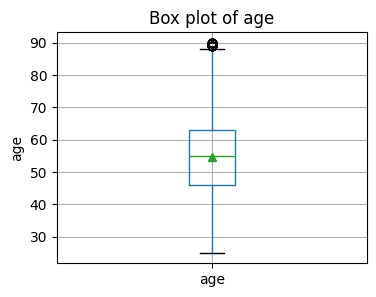

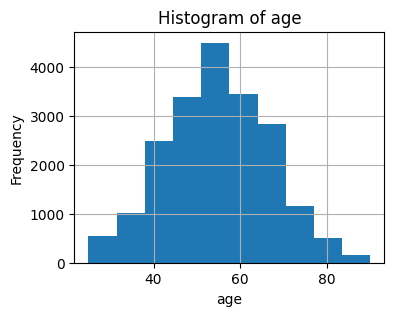

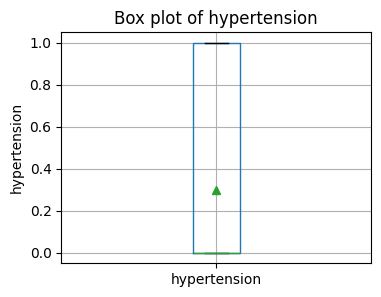

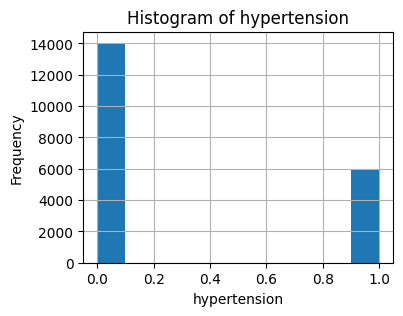

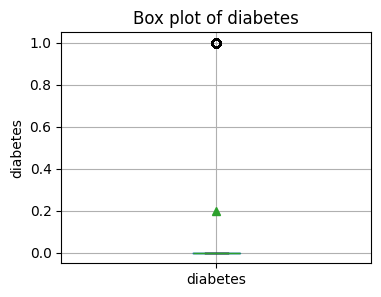

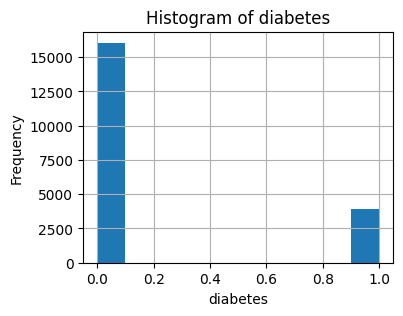

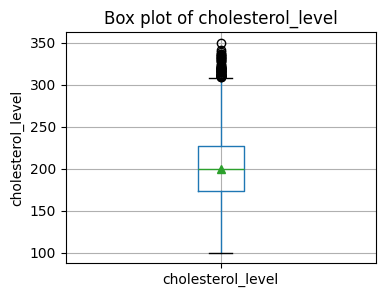

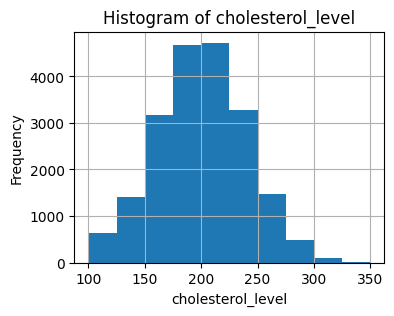

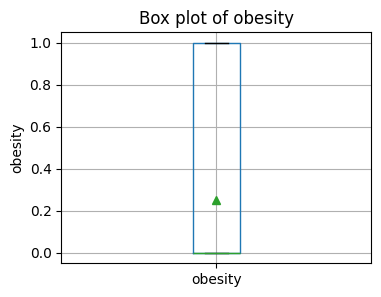

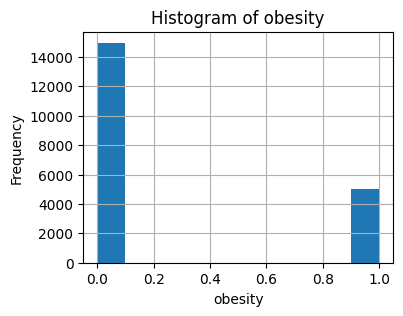

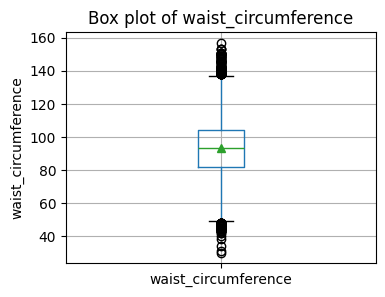

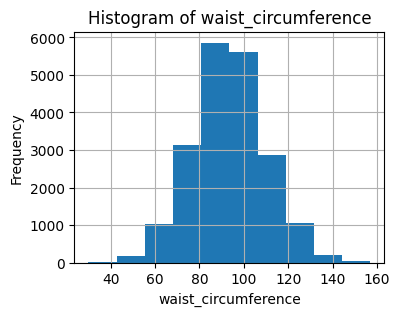

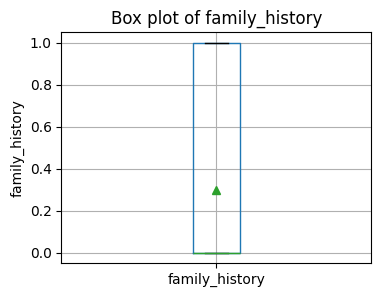

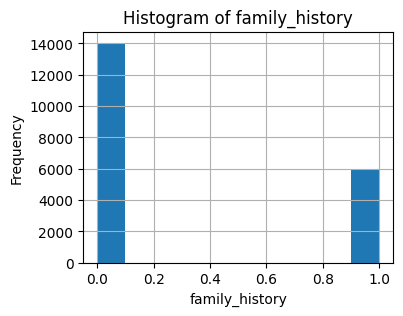

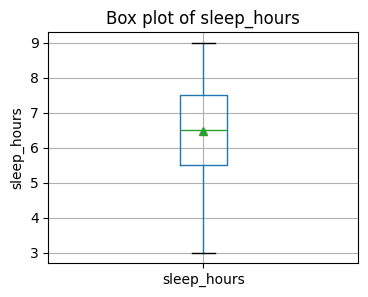

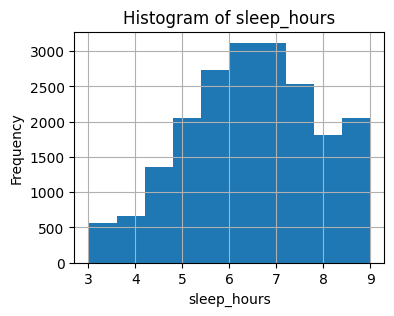

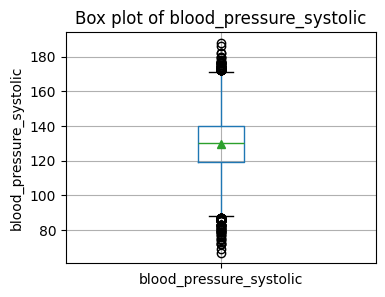

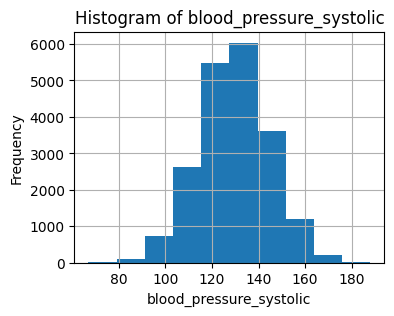

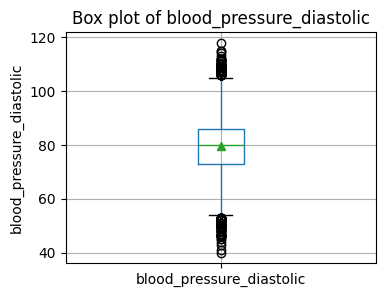

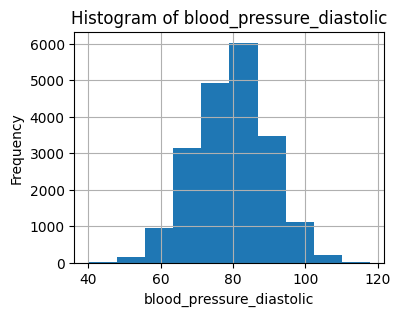

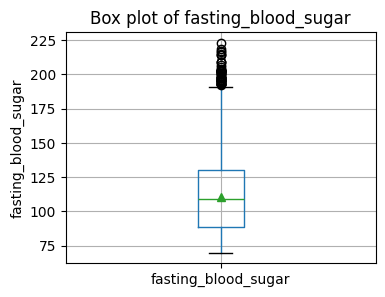

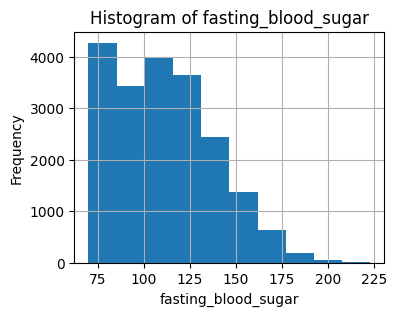

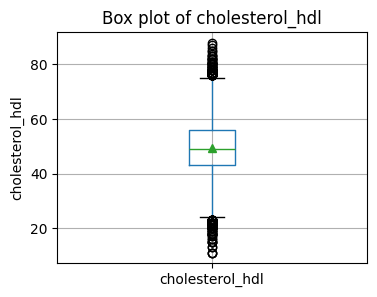

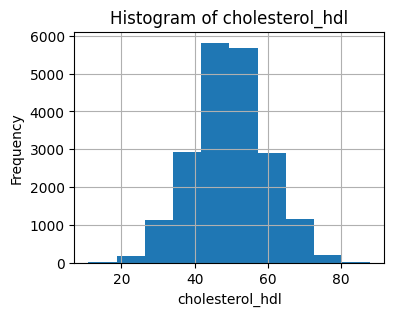

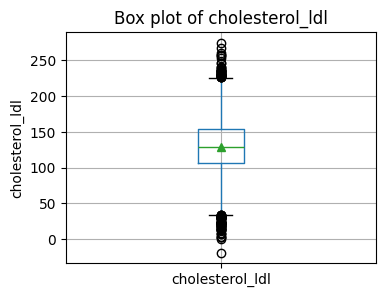

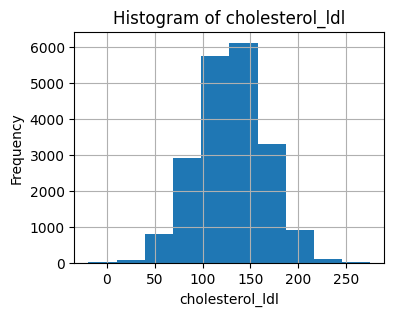

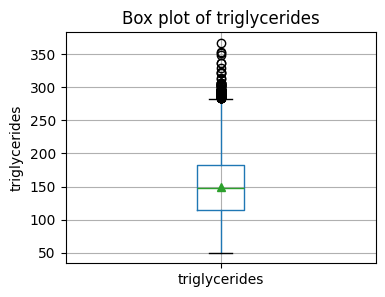

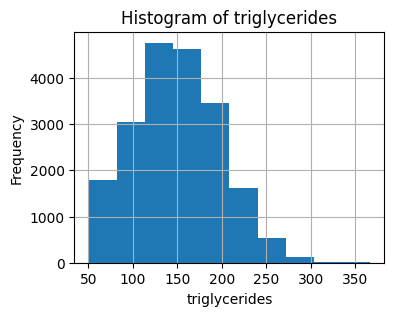

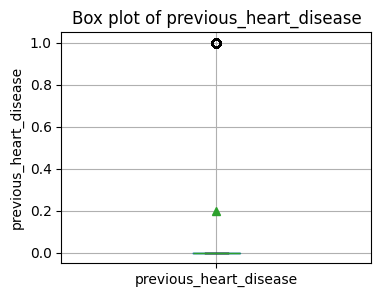

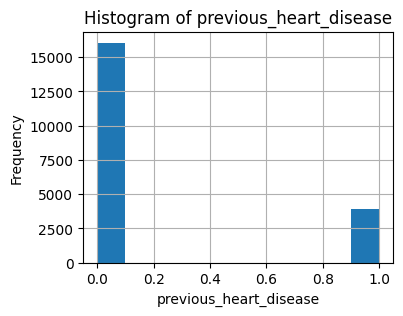

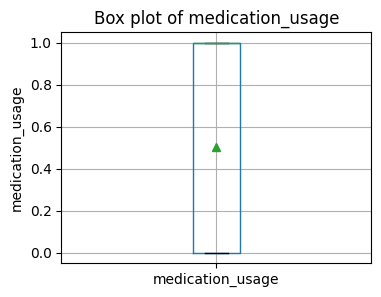

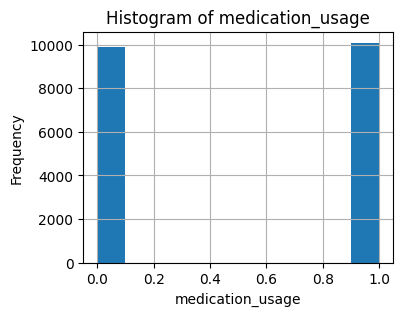

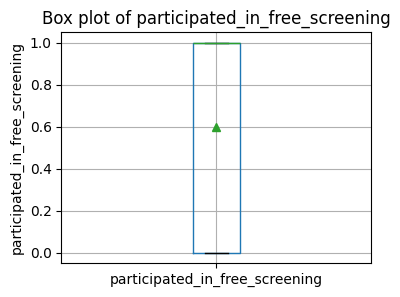

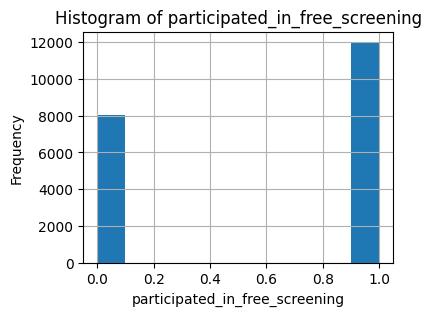

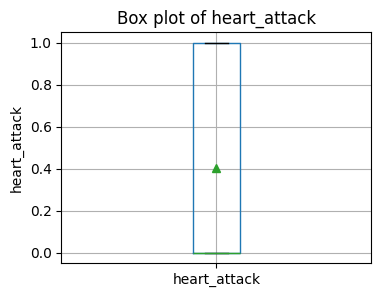

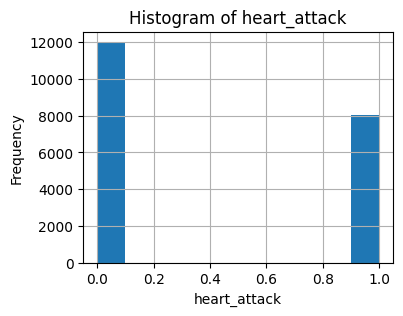

In [57]:
column_names_list = df.columns.tolist()
print("List of column names:", column_names_list)

num_cols = df.select_dtypes(include=np.number).columns.tolist()
cat_cols = [c for c in df.columns if c not in num_cols]

for column in num_cols:
    # Boxplot
    plt.figure(figsize=(4, 3))
    df.boxplot(
        column=[column],
        meanline=False,
        showmeans=True,
        return_type="dict"
    )
    plt.title(f"Box plot of {column}")
    plt.ylabel(column)
    plt.show()

    # Histogram
    plt.figure(figsize=(4, 3))
    df[column].hist(bins=10)
    plt.title(f"Histogram of {column}")
    plt.xlabel(column)
    plt.ylabel("Frequency")
    plt.show()

## Identify errors or ouliers - univariate analysis

Quantifies which individual features have the strongest linear association with the target. Good sanity check that previous_heart_disease, hypertension, etc... matter.

In [58]:
corr = df.corr(method="pearson", numeric_only=True)
print("Top correlations with target:")
print(corr[TARGET].abs().sort_values(ascending=False).head(10))


Top correlations with target:
heart_attack               1.000000
previous_heart_disease     0.272145
hypertension               0.267843
diabetes                   0.191230
obesity                    0.159259
age                        0.108158
cholesterol_level          0.090849
fasting_blood_sugar        0.070085
waist_circumference        0.057434
blood_pressure_systolic    0.013602
Name: heart_attack, dtype: float64


## Bi-variate outlier repair - triglycerides vs cholesterol_level

- Medical data are expensive so we are not going to drop missing values...
- We keep each record and correct a wrong values with new ones from closest points.

In [59]:
def lin_fun(x, a, b): return a*x + b
a, b = curve_fit(lin_fun,
                 df["cholesterol_level"],
                 df["triglycerides"])[0]

residuals = df["triglycerides"] - lin_fun(df["cholesterol_level"], a, b)
mask_out = residuals.abs() > 2*residuals.std()

print(f"Replacing {mask_out.sum()} triglyceride outliers by regression prediction")
df.loc[mask_out, "triglycerides"] = lin_fun(df.loc[mask_out, "cholesterol_level"], a, b)


Replacing 978 triglyceride outliers by regression prediction


/var/folders/03/jf9b8_ss5_ngw7_9xgwlnkg40000gn/T/ipykernel_11220/162030199.py:10: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '[149.50686339 149.99334138 148.81555256 148.40588688 148.89236488
 149.41724902 149.0203854  149.21241618 149.69889417 148.86676077
 149.49406134 149.41724902 148.20105405 149.27642645 148.81555256
 150.10855985 149.90372701 149.3148326  148.91796898 149.08439566
 148.7771464  149.8269147  149.13560387 148.76434435 148.67472998
 149.66048802 148.80275051 148.95637514 148.5083033  148.7515423
 149.27642645 149.53246749 149.16120797 148.94357308 148.49550125
 148.27786636 147.9706171  149.23802029 148.95637514 149.67329007
 149.16120797 148.54670946 149.00758335 148.96917719 148.41868894
 149.60927981 149.73730033 148.14984584 148.41868894 149.48125928
 149.64768596 149.50686339 149.0459895  148.87956282 148.55951151
 149.09719771 149.0459895  148.94357308 149.72449828 149.5580716

## Handle missing values

- No missing values in the dataset.
- Only 1 column has missing values but it is not relevant, because column has values called "None" which in pandas means null..


In [60]:
print("Missing cells per column:")
print(df.isna().sum())


Missing cells per column:
age                                   0
gender                                0
region                                0
income_level                          0
hypertension                          0
diabetes                              0
cholesterol_level                     0
obesity                               0
waist_circumference                   0
family_history                        0
smoking_status                        0
alcohol_consumption               11947
physical_activity                     0
dietary_habits                        0
air_pollution_exposure                0
stress_level                          0
sleep_hours                           0
blood_pressure_systolic               0
blood_pressure_diastolic              0
fasting_blood_sugar                   0
cholesterol_hdl                       0
cholesterol_ldl                       0
triglycerides                         0
EKG_results                           0
previous_heart

"## 13 Standardise numeric features (z‑score)

For every numeric column *x* we compute

\[
z = \frac{x - \text{mean}(x)}{\text{std}(x)}
\]

so that each feature now has **mean ≈ 0** and **standard deviation≈1**.
This “unit‑variance” scaling prevents variables with large raw ranges
(e.g. cholesterol mg/dL) from swamping small‑range variables (e.g. age years)
inside the Gaussian Naïve Bayes likelihood calculation and improves numerical stability.

In [61]:
for col in num_cols:
    df[col] = (df[col] - df[col].mean()) / df[col].std()


## Encode categorical variables to numeric

Change categorical variables to numeric using one-hot encoding

In [62]:
df = pd.get_dummies(df, columns=cat_cols, dtype=np.int8)


## Save files for future use

To use the preprocessed data in the future

- heart_preprocessed.npz - for Naive Bayes
- heart_preprocessed.csv - any other modifications

In [63]:
X = df.drop(columns=[TARGET]).values       # NumPy array for Naive Bayes
y = df[TARGET].values.astype(np.int8)

np.savez_compressed("heart_preprocessed_naive_bayes.npz", X=X, y=y)
df.to_csv("heart_preprocessed_naive_bayes.csv", index=False)

print("Preprocessing finished")
print("Final feature matrix shape:", X.shape)


Preprocessing finished
Final feature matrix shape: (20000, 42)
